<a href="https://colab.research.google.com/github/kendzisah/DeepImageClassifier/blob/main/Deep_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Depencies and setting up Computer

In [3]:
pip install tensorflow opencv-python matplotlib

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Preparing/Cleaning Data

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [10]:
data_dir = 'drive/MyDrive/datasets'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image{}'.format(image_path))

Image not in ext list drive/MyDrive/datasets/Sad/CC_HE_1221887081_SituationalDepression.jpg
Image not in ext list drive/MyDrive/datasets/Sad/1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list drive/MyDrive/datasets/Sad/man-with-head-down.jpg
Image not in ext list drive/MyDrive/datasets/Sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list drive/MyDrive/datasets/Sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list drive/MyDrive/datasets/Sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list drive/MyDrive/datasets/Sad/sad-person-pictures-1920-x-1200-qq00l14kkjed5hew.jpg
Image not in ext list drive/MyDrive/datasets/Sad/Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
Image not in ext list drive/MyDrive/datasets/Sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list drive/MyDrive/datasets/Sad/unpleasant-pain-sad-unhappy-handsome-600nw-1060449161.jpg
Ima

Loading Data

In [12]:
tf.data.Dataset??

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 190 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [21]:
# gets another batch from the iterator
batch = data_iterator.next()

In [22]:
# Prints out an array containing labels in the current batch. Class 1 = Sad people, Class 2 = happy people
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

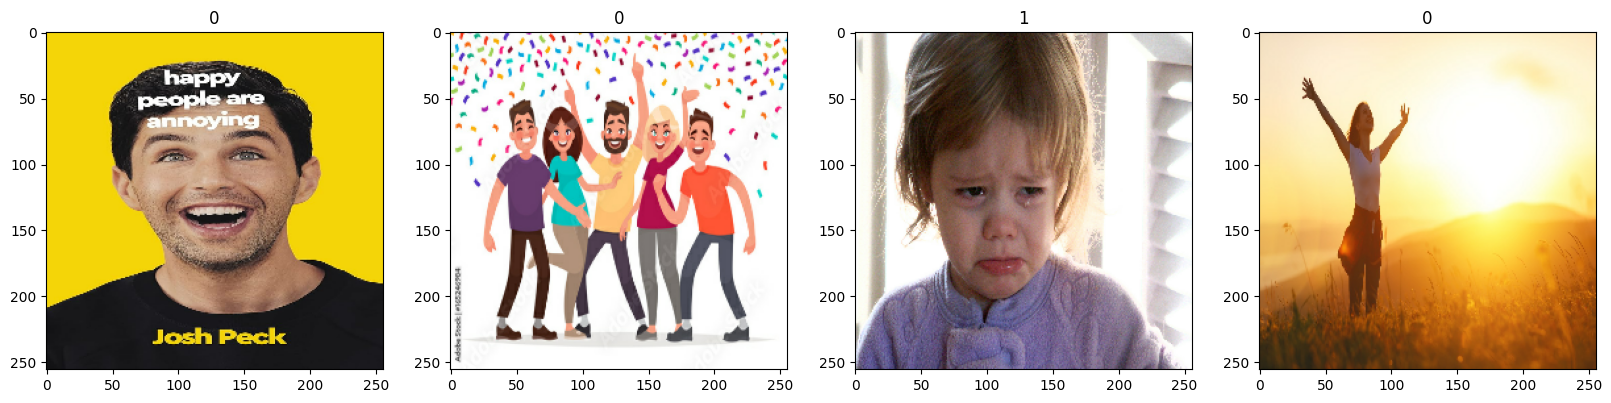

In [20]:
# to figure out what each label represents (e.g. happy or sad)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Preprocess Data


In [27]:
data = data.map(lambda x,y: (x/255, y))

In [31]:
data.as_numpy_iterator().next()

(array([[[[6.08919263e-01, 5.33523858e-01, 5.09108841e-01],
          [6.06473088e-01, 5.06704748e-01, 4.79047954e-01],
          [5.13096452e-01, 4.03429449e-01, 3.64841849e-01],
          ...,
          [5.77665448e-01, 6.28645837e-01, 5.20618856e-01],
          [5.13395190e-01, 5.68297148e-01, 4.28191066e-01],
          [4.83394593e-01, 5.30453444e-01, 3.73590678e-01]],
 
         [[6.24104798e-01, 5.45741439e-01, 5.13044775e-01],
          [5.65461278e-01, 4.64787275e-01, 4.36677575e-01],
          [4.50315952e-01, 3.40417236e-01, 2.97564328e-01],
          ...,
          [5.94087005e-01, 6.42812669e-01, 5.42138696e-01],
          [5.18504918e-01, 5.73406875e-01, 4.37265426e-01],
          [4.74325985e-01, 5.21384776e-01, 3.69835705e-01]],
 
         [[6.04652047e-01, 5.12250125e-01, 4.76465791e-01],
          [5.16472340e-01, 4.03831571e-01, 3.70084643e-01],
          [4.38041896e-01, 3.18688720e-01, 2.77267158e-01],
          ...,
          [6.09946549e-01, 6.57668889e-01, 5.6973